In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("student_dropout.csv")

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.shape

(4424, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [7]:
df.isnull().sum()
#no missing values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
df.duplicated().sum()
#no duplicate values

0

In [9]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [10]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [11]:
#make a copy of the dataframe that include numeric values.
df_numeric = df.copy()
le = LabelEncoder()
df_numeric['Target'] = le.fit_transform(df_numeric['Target'].astype(str))

In [12]:
df.select_dtypes("number").columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

D:\Anaconda\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


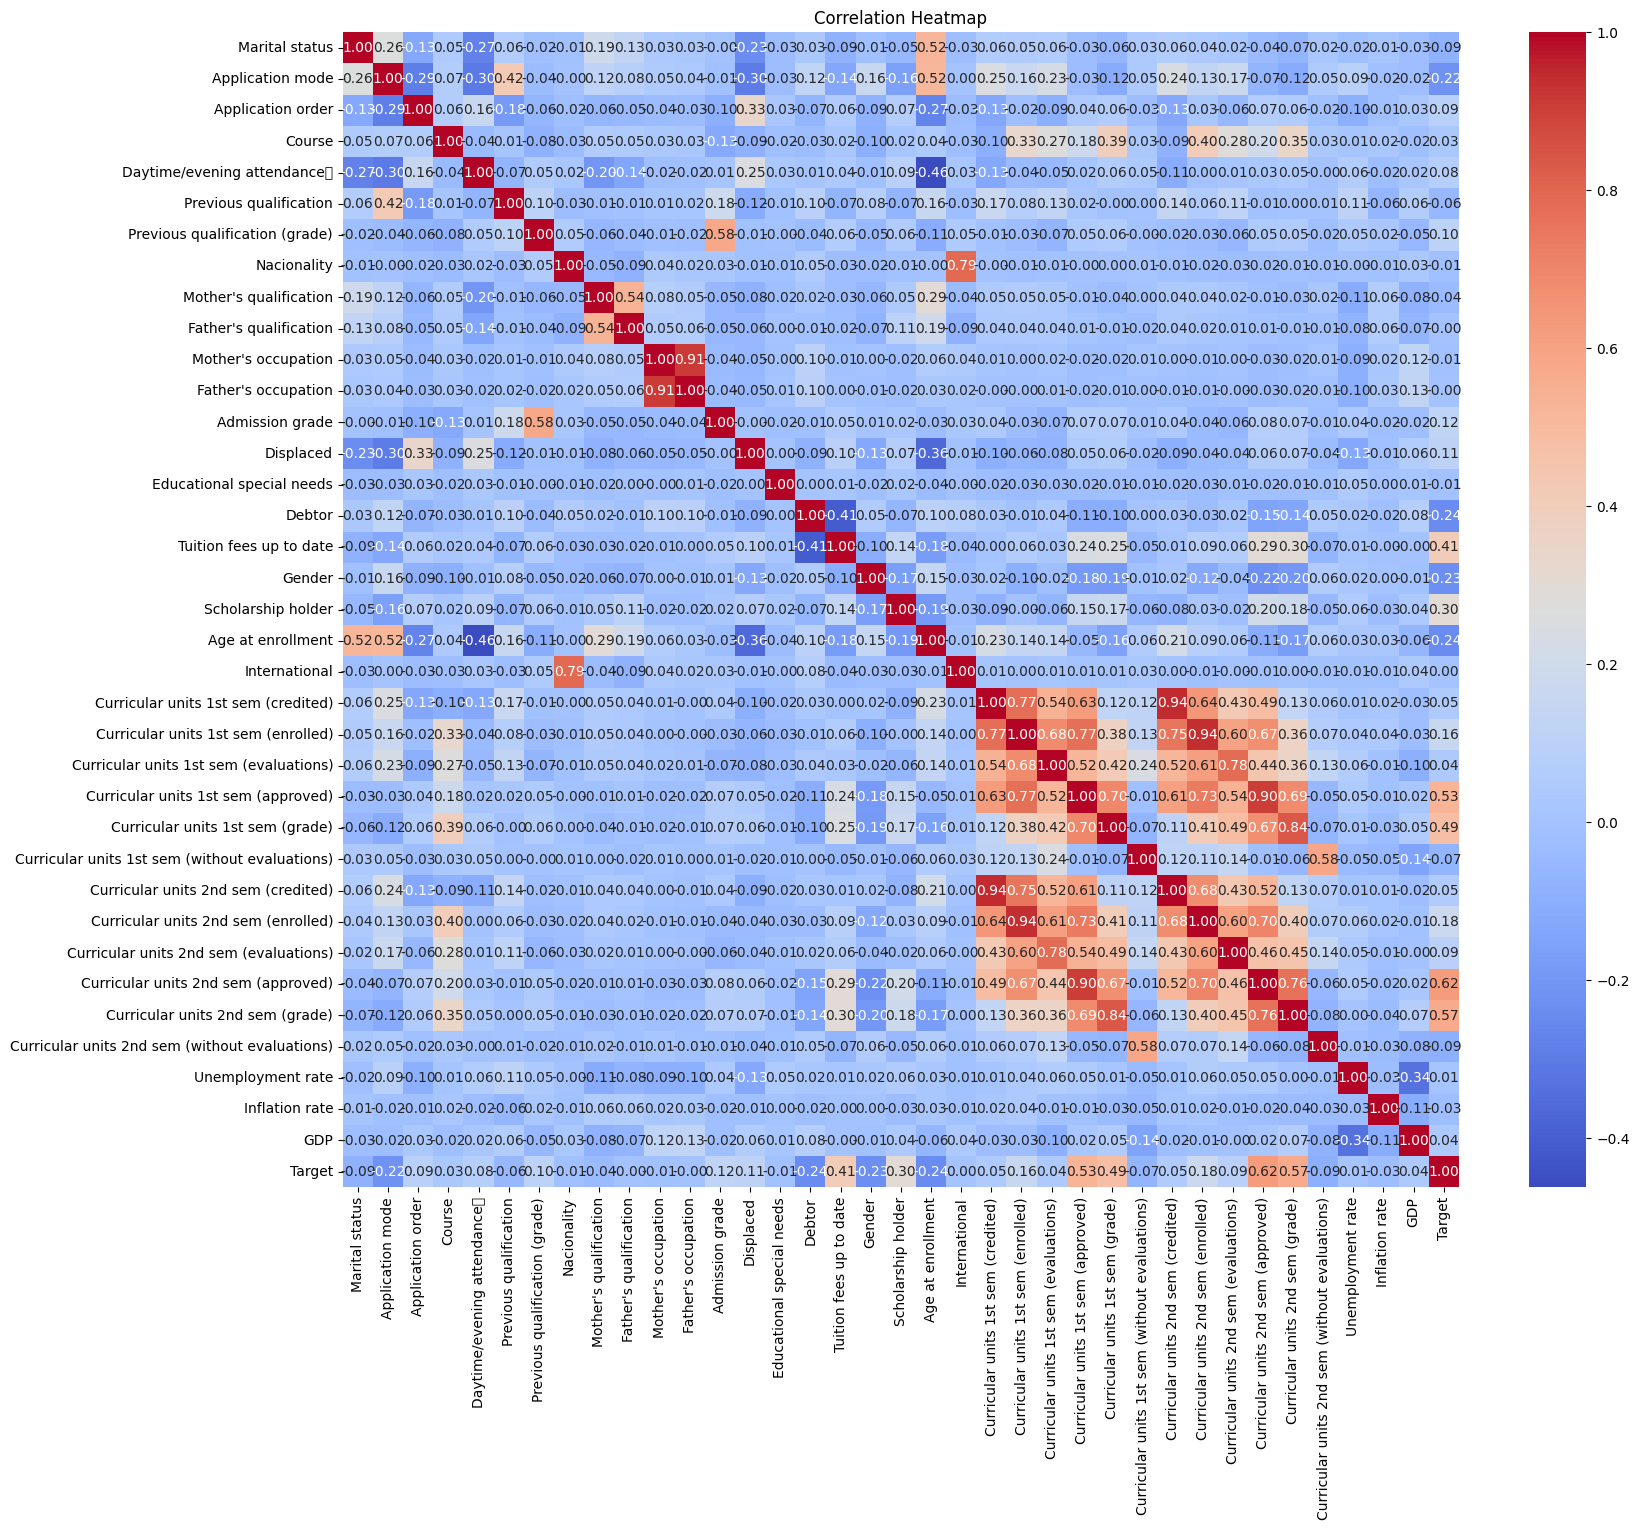

In [13]:
corr_matrix = df_numeric.corr()
# making a heatmap from the correlation of features
# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# feature selection for features with correlation with target more than or equal 0.45 
X=df_numeric[['Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)']]
y=df_numeric['Target']

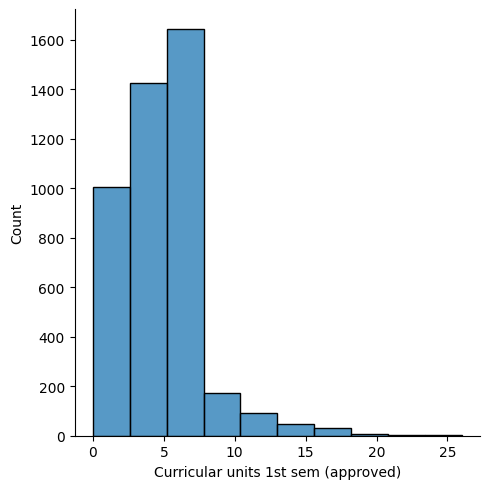

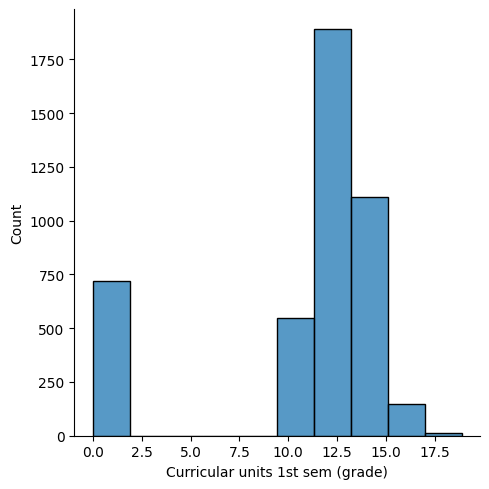

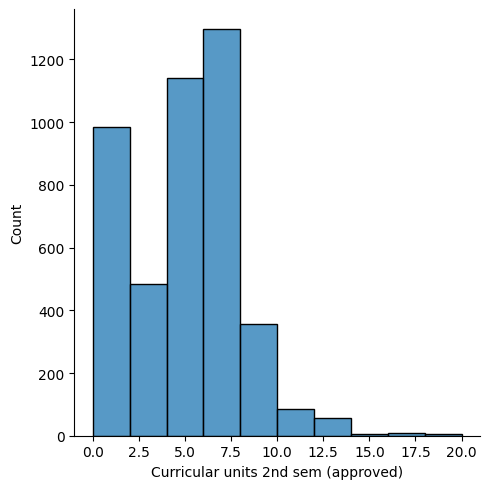

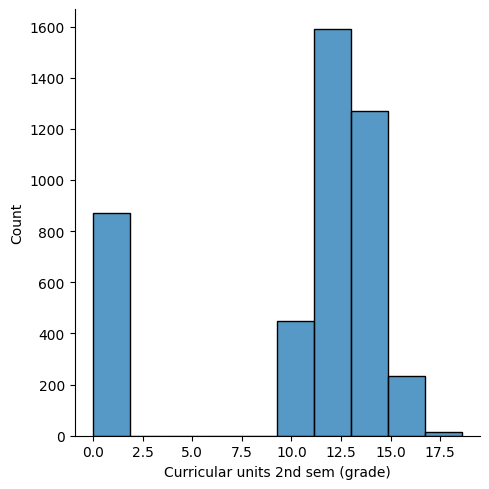

In [15]:
for i in X:
    sns.displot(df,x=i,bins=10)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [18]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)

In [19]:
# Create a function for model evaluations
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import StratifiedKFold

def evaluate(X_test, y_test, predict, X, y, model):
    accuracy = model.score(X_test, y_test)
    print(f'Accuracy: {accuracy}')
    
    Precision = metrics.precision_score(y_test, predict,average='weighted')
    print(f'Precision: {Precision}')
    
    Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
    print(f'Sensitivity recall: {Sensitivity_recall}')
    
    F1_score = metrics.f1_score(y_test,predict,average='weighted')
    print(f'F1 score: {F1_score}')
    
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f'Cross Validation Scores: {cv_scores}\n')

    print("Cross validation for k_folds = 5")
    k_folds = KFold(n_splits = 5)
    scores = cross_val_score(lm, x_train, y_train, cv = k_folds)
    print("Cross Validation Scores: ", scores)
    print("Average CV Score: ", scores.mean())
    print("Number of CV Scores used in Average: ", len(scores))

    print("\nCross validation for sk_folds = 5")
    sk_folds = StratifiedKFold(n_splits = 5)
    scores = cross_val_score(lm, x_train, y_train, cv = sk_folds)
    print("Cross Validation Scores: ", scores)
    print("Average CV Score: ", scores.mean())
    print("Number of CV Scores used in Average: ", len(scores))

In [20]:
# Create a function to plot Confusion Matrix
def conmat(y_test,predict):
    y_test = np.array(y_test) 
    predict = np.array(predict)
    
    confusion_matrix = metrics.confusion_matrix(y_test, predict)
    classes = np.unique(y_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                                display_labels=classes)
    cm_display.plot()
    plt.show()

In [21]:
#create a function for roc curve and roc auc score
from sklearn.metrics import roc_auc_score, roc_curve
def roc_auc(y_test,y_pred_prob):
    auc_score = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
    print(f"ROC AUC Score: {auc_score}")
    
    fpr = {}
    tpr = {}
    thresholds = {}
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    
    plt.figure()
    for i in range(y_test_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i}')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

**Random Forest**

In [23]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [24]:
# fit the model
from sklearn.ensemble import RandomForestClassifier  
lm= RandomForestClassifier(n_estimators= 100, criterion="entropy",max_depth=10,min_samples_leaf=4,min_samples_split=2) 

lm.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4)

In [25]:
predict=lm.predict(x_test)

C:\Users\user\AppData\Local\Temp\ipykernel_15116\21246511.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


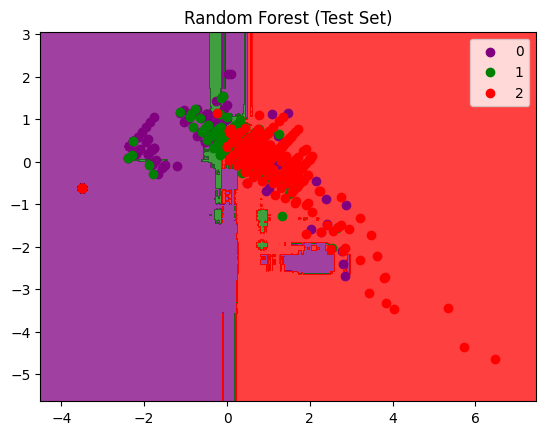

In [26]:
#plot a listed colormap for the random forest classifier
from matplotlib.colors import ListedColormap 
x_set, y_set = x_test, y_test  
pca = PCA(n_components=2)
x_set = pca.fit_transform(x_test)
x1, x2= np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
x1=x1.astype(float)
x2=x2.astype(float)
meshgrid_data = np.array([x1.ravel(), x2.ravel()]).T
original_space_data = pca.inverse_transform(meshgrid_data)
plt.contourf(x1, x2, lm.predict(original_space_data).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green','red'))(i), label = j)  
plt.title('Random Forest (Test Set)')    
plt.legend()  
plt.show()  

**Evaluation**

In [28]:
y_pred_prob = lm.predict_proba(x_test)

In [29]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  

ROC AUC Score: 0.8292404912841294


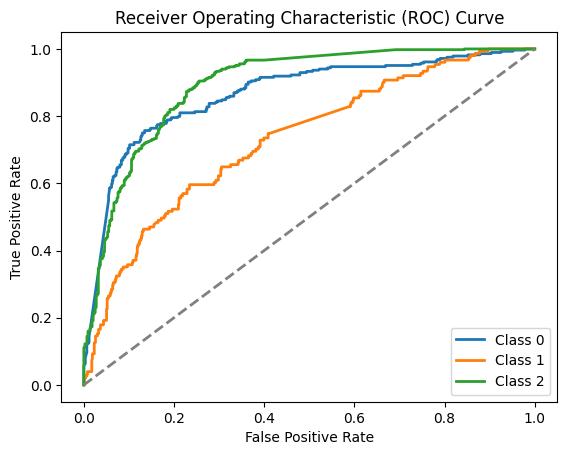

In [30]:
roc_auc(y_test, y_pred_prob)

In [31]:
evaluate(x_test, y_test, predict, X, y, lm)

Accuracy: 0.7401129943502824
Precision: 0.7175185541287236
Sensitivity recall: 0.7401129943502824
F1 score: 0.7150239484378857
Cross Validation Scores: [0.71638418 0.72090395 0.7039548  0.73107345 0.70135747]

Cross validation for k_folds = 5
Cross Validation Scores:  [0.69774011 0.72175141 0.68502825 0.68785311 0.69731259]
Average CV Score:  0.6979370939515259
Number of CV Scores used in Average:  5

Cross validation for sk_folds = 5
Cross Validation Scores:  [0.70056497 0.71327684 0.68644068 0.69491525 0.69731259]
Average CV Score:  0.6985020657029383
Number of CV Scores used in Average:  5


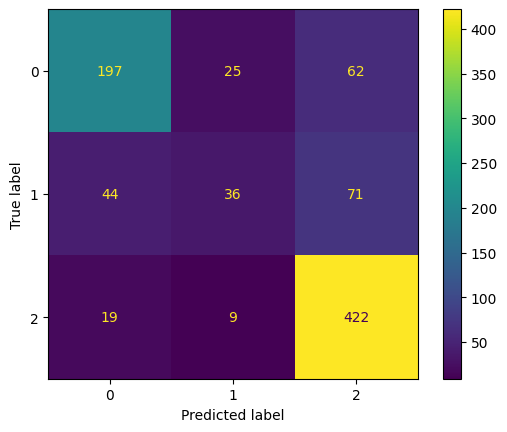

In [32]:
conmat(y_test,predict)

In [33]:
from sklearn.model_selection import LeavePOut, cross_val_score
lpo = LeavePOut(p=1) #require A LOT of computational power. (works well in other models but require more computational power with random forest)
#remove the hashtag from the lines below to run the code.
#scores = cross_val_score(lm, x_train, y_train, cv = lpo)
# print("Cross Validation Scores: ", scores)
# print("Average CV Score: ", scores.mean())
# print("Number of CV Scores used in Average: ", len(scores))

In [34]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
loo = LeaveOneOut() #require A LOT of computational power.  (works well in other models but require more computational power with random forest)
#remove the hashtag from the lines below to run the code.
#scores = cross_val_score(lm, x_train, y_train, cv = loo)
# print("Cross Validation Scores: ", scores)
# print("Average CV Score: ", scores.mean())
# print("Number of CV Scores used in Average: ", len(scores))

**Logistic Regression**

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
param_dist = {'C': [0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
random_search = RandomizedSearchCV(estimator=lm, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_

# Define the class weights
class_weights = {0: 1.0, 1: 2.0, 2: 1.0}

lm=LogisticRegression(solver='lbfgs',random_state=0,C=best_params['C'],class_weight=class_weights)
solver=best_params['solver']
lm.fit(x_train,y_train)

LogisticRegression(C=100, class_weight={0: 1.0, 1: 2.0, 2: 1.0}, random_state=0)

In [38]:
predict=lm.predict(x_test)

float64 float64 float64 float64


C:\Users\user\AppData\Local\Temp\ipykernel_15116\131599833.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


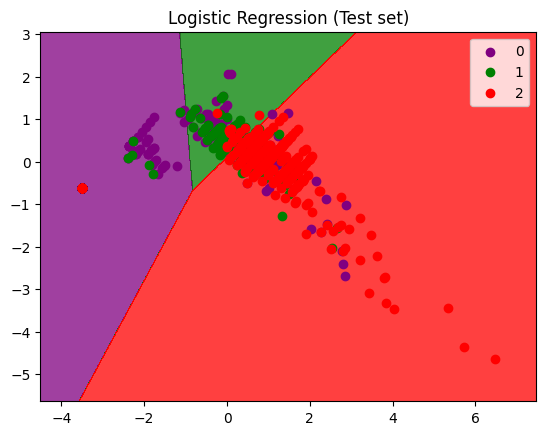

In [39]:
# plot a listed color map for logistic regression.
from matplotlib.colors import ListedColormap 
x_set, y_set = x_test, y_test  
pca = PCA(n_components=2)
x_set = pca.fit_transform(x_test)
x1, x2= np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
x1=x1.astype(float)
x2=x2.astype(float)

meshgrid_data = np.array([x1.ravel(), x2.ravel()]).T
meshgrid_data = meshgrid_data.astype(float)
original_space_data = original_space_data.astype(float)
print(x1.dtype, x2.dtype, meshgrid_data.dtype, original_space_data.dtype)
original_space_data = pca.inverse_transform(meshgrid_data)
plt.contourf(x1, x2, lm.predict(original_space_data).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green','red'))(i), label = j)  
plt.title('Logistic Regression (Test set)')    
plt.legend()  
plt.show()  

**Evaluation**

In [41]:
y_pred_prob = lm.predict_proba(x_test)

In [42]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  

ROC AUC Score: 0.8101648612102849


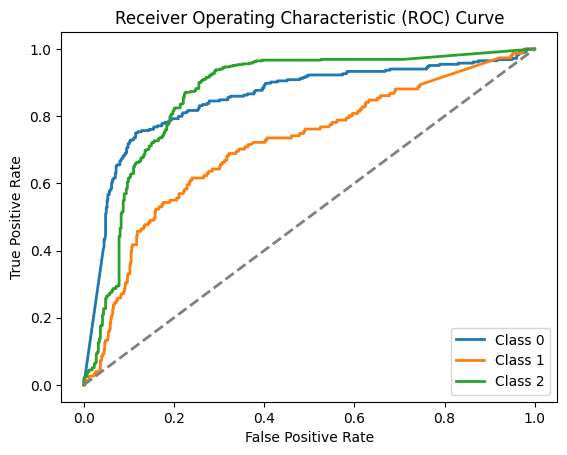

In [43]:
roc_auc(y_test,y_pred_prob)

In [44]:
evaluate(x_test,y_test,predict,X,y,lm)

Accuracy: 0.7310734463276836
Precision: 0.7360735000537867
Sensitivity recall: 0.7310734463276836
F1 score: 0.7208110633683731
Cross Validation Scores: [0.70169492 0.70960452 0.70282486 0.69265537 0.6821267 ]

Cross validation for k_folds = 5
Cross Validation Scores:  [0.69774011 0.69774011 0.67090395 0.69491525 0.7029703 ]
Average CV Score:  0.6928539464115901
Number of CV Scores used in Average:  5

Cross validation for sk_folds = 5
Cross Validation Scores:  [0.70621469 0.69915254 0.66242938 0.69491525 0.69731259]
Average CV Score:  0.6920048905616955
Number of CV Scores used in Average:  5


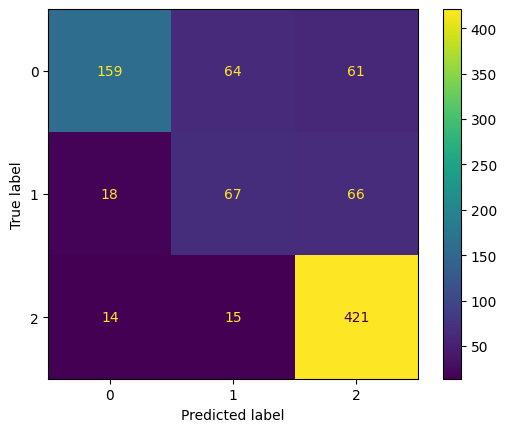

In [45]:
conmat(y_test,predict)

In [46]:
from sklearn.model_selection import LeavePOut, cross_val_score
lpo = LeavePOut(p=1) #adjusted to 1 because 2 and above require a lot of computing power. same as leaveOneOut but uses a different method.
scores = cross_val_score(lm, x_train, y_train, cv = lpo)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 0. 1. ... 1. 0. 0.]
Average CV Score:  0.6914382593953095
Number of CV Scores used in Average:  3539


In [47]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
loo = LeaveOneOut()
scores = cross_val_score(lm, x_train, y_train, cv = loo)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 0. 1. ... 1. 0. 0.]
Average CV Score:  0.6914382593953095
Number of CV Scores used in Average:  3539


**KNN**

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train, y_train)
print(knn_cv.best_params_)

{'n_neighbors': 32}


In [50]:
lm=KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'], metric='minkowski', p=1 )

lm.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=32, p=1)

In [51]:
predict=lm.predict(x_test)

C:\Users\user\AppData\Local\Temp\ipykernel_15116\2744483230.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


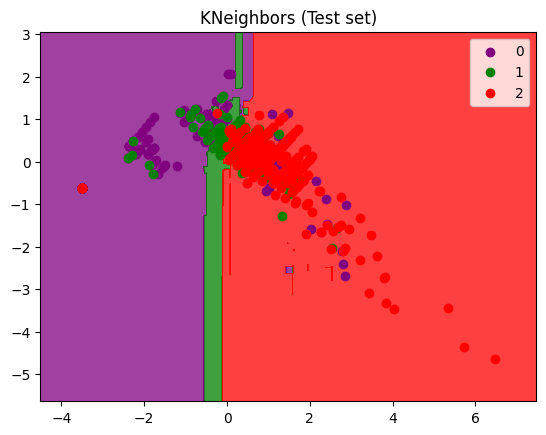

In [52]:
# plot a listed color map for KNN
from matplotlib.colors import ListedColormap 
x_set, y_set = x_test, y_test  
pca = PCA(n_components=2)
x_set = pca.fit_transform(x_test)
x1, x2= np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
x1=x1.astype(float)
x2=x2.astype(float)
meshgrid_data = np.array([x1.ravel(), x2.ravel()]).T
original_space_data = pca.inverse_transform(meshgrid_data)
plt.contourf(x1, x2, lm.predict(original_space_data).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green','red'))(i), label = j)  
plt.title('KNeighbors (Test set)')    
plt.legend()  
plt.show()  

**Evaluation**

In [54]:
y_pred_prob = lm.predict_proba(x_test)

In [55]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  

ROC AUC Score: 0.8338342281321615


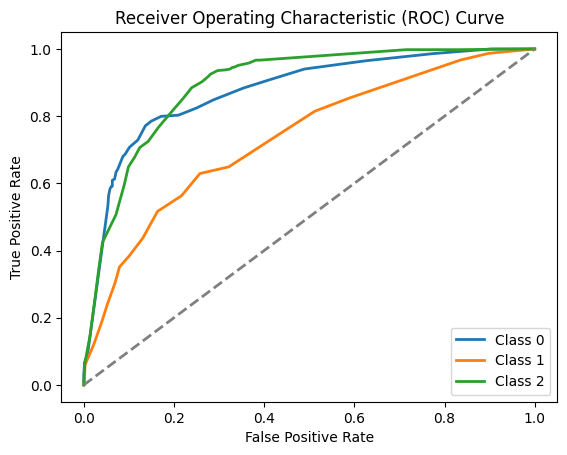

In [56]:
roc_auc(y_test,y_pred_prob)

In [57]:
evaluate(x_test,y_test,predict,X,y,lm)

Accuracy: 0.7435028248587571
Precision: 0.7194878567291517
Sensitivity recall: 0.7435028248587571
F1 score: 0.7142707174356285
Cross Validation Scores: [0.72768362 0.70621469 0.71299435 0.71864407 0.71606335]

Cross validation for k_folds = 5
Cross Validation Scores:  [0.69350282 0.72457627 0.6779661  0.70762712 0.69731259]
Average CV Score:  0.7001969809571756
Number of CV Scores used in Average:  5

Cross validation for sk_folds = 5
Cross Validation Scores:  [0.7019774  0.72740113 0.67937853 0.70903955 0.69306931]
Average CV Score:  0.7021731834200369
Number of CV Scores used in Average:  5


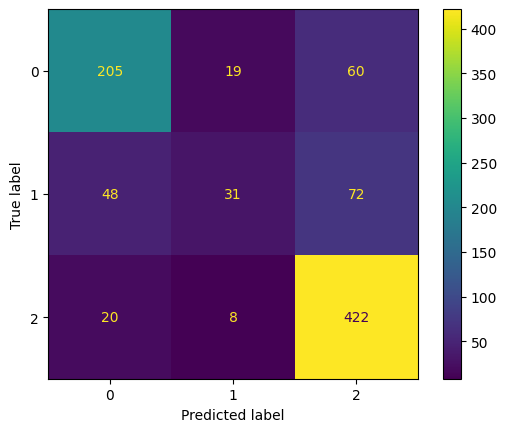

In [58]:
conmat(y_test,predict)

In [59]:
from sklearn.model_selection import LeavePOut, cross_val_score
lpo = LeavePOut(p=1) #adjusted to 1 because 2 and above require a lot of computing power. same as leaveOneOut but uses a different method.
scores = cross_val_score(lm, x_train, y_train, cv = lpo)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 0. 1. ... 1. 0. 0.]
Average CV Score:  0.7064142413111049
Number of CV Scores used in Average:  3539


In [60]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
loo = LeaveOneOut()
scores = cross_val_score(lm, x_train, y_train, cv = loo)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 0. 1. ... 1. 0. 0.]
Average CV Score:  0.7064142413111049
Number of CV Scores used in Average:  3539
